In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import statsmodels.api as sm
from scipy import stats
data=pd.read_csv("https://gist.githubusercontent.com/EconometricsBySimulation/5735039/raw/c77c7e9ca27f45ca989200f696f0ccc5aec4132a/heightweight.csv",usecols=("heightIn","weightLb"))
data.head()

,heightIn,weightLb
0,56.3,85.0
1,62.3,105.0
2,63.3,108.0
3,59.0,92.0
4,62.5,112.5


In [2]:
data.isnull().sum()

heightIn    0
weightLb    0
dtype: int64

In [3]:
stats.shapiro(data['heightIn'])

ShapiroResult(statistic=0.9962847828865051, pvalue=0.8473318219184875)

In [4]:
stats.shapiro(data['weightLb'])

ShapiroResult(statistic=0.9699857234954834, pvalue=6.59234938211739e-05)

<AxesSubplot:xlabel='weightLb'>

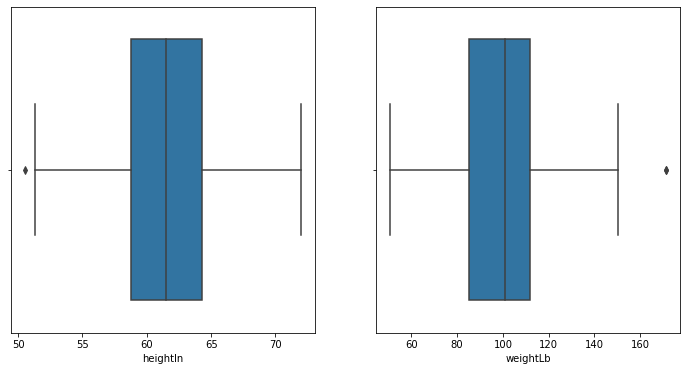

In [11]:
plt.figure(figsize = [12,6])
plt.subplot(1,2,1)
sns.boxplot(x=data['heightIn'])
plt.subplot(1,2,2)
sns.boxplot(x=data['weightLb'])

In [12]:
data.shape

(237, 2)

In [13]:
train=data.iloc[0:189]
train.shape

(189, 2)

In [14]:
test=data.iloc[189:237]
test.shape

(48, 2)

In [15]:
stats.pearsonr(data.heightIn,data.weightLb)

(0.7748761066276015, 1.028685831403233e-48)

In [16]:
train_x=train.heightIn
train_y=train.weightLb
train_x=sm.add_constant(train_x)
model=sm.OLS(train_y,train_x).fit()

C:\Users\VICKY R R\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [18]:
test_x=test.heightIn
test_y=test.weightLb
test_x=sm.add_constant(test_x)
model1=sm.OLS(test_y,test_x).fit()

<AxesSubplot:xlabel='heightIn', ylabel='weightLb'>

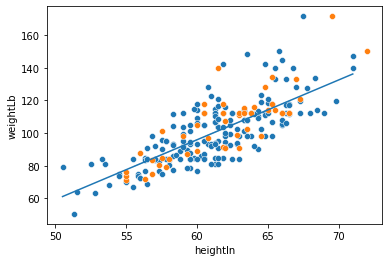

In [19]:
sns.scatterplot(x=train.heightIn,y=train.weightLb)
sns.scatterplot(x=test.heightIn,y=test.weightLb)
predicted_y=model.predict(train_x)
sns.lineplot(x=train.heightIn,y=predicted_y)

<AxesSubplot:xlabel='heightIn', ylabel='weightLb'>

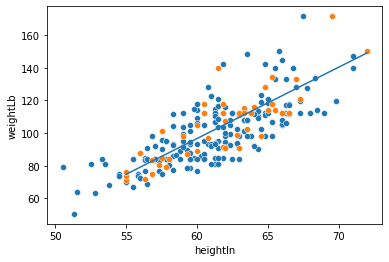

In [20]:
sns.scatterplot(x=train.heightIn,y=train.weightLb)
sns.scatterplot(x=test.heightIn,y=test.weightLb)
predicted_y=model1.predict(test_x)
sns.lineplot(x=test.heightIn,y=predicted_y)